<a href="https://colab.research.google.com/github/samhuairen/Deeplearning-with-python/blob/main/Chapter3_TensorFlow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 第三章 **TensorFlow入门**


1.   张量
Numpy 数组和tensorflow 张量的区别是，TensorFlow的张量是不可赋值的，它是常量

2.   张量运算
3.   反向传播
4.   层
5.   损失函数
6.   优化器
7.   指标
8.   训练循环



In [1]:
#代码清单 3-1 全1 或者全0 的张量
import tensorflow as tf
x = tf.ones(shape=(2,1))
print(x)
y = tf.zeros(shape=(2,1))
print(y)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [2]:
#代码清单 3-2 随机张量
x = tf.random.normal(shape=(3,1), mean=0, stddev=1)
print(x)

tf.Tensor(
[[-0.3321202 ]
 [-0.93551934]
 [ 0.593042  ]], shape=(3, 1), dtype=float32)


In [3]:
x = tf.random.uniform(shape=(3,1),minval=0,maxval=1)
print(x)
# np.random.uniform(size=(3,1),low=0, high=1)

tf.Tensor(
[[0.23898232]
 [0.03037846]
 [0.6311331 ]], shape=(3, 1), dtype=float32)


In [5]:
# Numpy 数组和tensorflow 张量的区别是，TensorFlow的张量是不可赋值的，它是常量
# 代码清单 3-3
import numpy as np
x = np.ones(shape=(2,2))
x[0,0] = 0
print(x)


[[0. 1.]
 [1. 1.]]


In [8]:
# 代码清单 3-4
x = tf.ones(shape=(2,2))

x
#x[0,0] = 0 TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [9]:
x[0,0] # 标量 shape =（）

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [10]:
#代码清单 3-5 创建一个TensorFlow 变量
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)
# 变量的状态可以采用assign方法进行修改


<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.15097317],
       [-0.83408016],
       [ 0.8223837 ]], dtype=float32)>


In [13]:
# 代码清单 3-6
v.assign(tf.ones((3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [14]:
# 代码清单 3-7 为tensorflow 变量子集赋值
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [15]:
# 代码清单 3-8 使用 assign_add()
v.assign_add(tf.ones((3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>


In [24]:
# 使用TensorFlow 进行数学运算，张量运算
# 代码清单 3-9
a = tf.ones((2,2))
b = tf.square(a) # 求平凡
c = tf.sqrt(a) # 求平方根
d = b + c
print(d)
print(c)
print(a)
print(b)
e = tf.matmul(a, b) # 两个张量的点积，
print(e)
e *= d # 张量的逐个元素相乘
print(e)

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [37]:
# 重温 GradientTape API 这个是一个给张量自动求微分的API，对于任何一个输出和给定的权重，都可以求出这个权重的导数；任何可微表达式相对于输入的梯度
# 代码清单 3-10
input_var = tf.Variable(initial_value=3.0)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)


tf.Tensor(6.0, shape=(), dtype=float32)


要检索模型损失对权重的梯度，最常用的就是tape.gradient(loss, weights)
loss是损失函数 weights是权重

In [34]:
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [29]:
print(input_var)

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>


In [32]:
# 代码清单 3-11 对常数张量使用GradientTape
input_constant = tf.constant(3.)
with tf.GradientTape() as tape:
  tape.watch(input_constant)
  result = tf.square(input_constant)
gradient = tape.gradient(result, input_constant)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [2]:
# 代码清单 3-12 利用嵌套的梯度来计算二阶梯度
import tensorflow as tf
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time ** 2
  speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


3.5.3 用TensorFlow 编写线性分类器

In [5]:
#1 首先要生成两类点点数据，这两类点分布在一个平面上，他们的形状相似，说明他们具有同样的协方差，均值不同，然后就能生成两类点
# 代码清单 3-13 在二维平面上随机生成两个类别的点
import numpy as np
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)


In [7]:
# 代码清单 3-14 将上面的数据叠成一个形状为（2000， 2）的数组
inputs = np.vstack((positive_samples, negative_samples)).astype(np.float32)
print(inputs)

[[ 1.6076891  -0.9558333 ]
 [ 2.275487   -1.064818  ]
 [ 3.1806138   0.61205816]
 ...
 [-1.358642    1.6084288 ]
 [ 0.12757662  1.9301065 ]
 [ 0.09902766  3.777087  ]]


In [8]:
# 代码清单 3-15 生成这些数字对应的标签，0， 1
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                    np.ones((num_samples_per_class, 1), dtype='float32')))


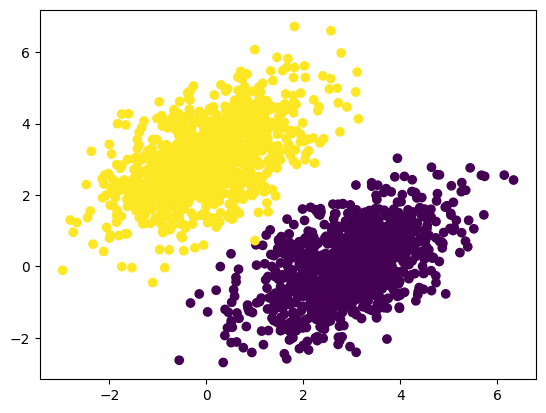

In [9]:
# 代码清单3-16 用matlplotlib 可视化
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

In [10]:
print(targets)

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


现在根据上面生成的数据，我们创建一个线性分类器，这个分类器的采用仿射变换，predictions = W . input + b ,根据这个仿射变换进行模型的训练

In [11]:
# 代码清单 3-17 创建线性分类器的变量
input_dim = 2 # 输入的是二维点
out_dim = 1 # 输出的是判别，一个分数值，如果样本跟0接近，就会属于0类别，如果跟1接近就是1类别
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, out_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(out_dim,)))


In [16]:
# 代码清单 3-18 向前传播函数
def model(inputs):
  return tf.matmul(inputs, W) + b

# 因为这个线性分类器的处理是二维输入，W 包含两个标量系数W1 和W2: W = [[W1, W2]], b则是一个标量系数，因为对于给定的点（x, y）, 其预测值为 predictions = [[W1, W2]].(x, y) + b
# = w1*x + w2*y + b

In [13]:
# 代码清单=3-19 均方误差损失函数
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets -predictions)
  return tf.reduce_mean(per_sample_losses)

# per_sample_losses 是一个与targets和predictions具有相同形状的张量，其中包含每一个样本的损失值
# 计算每一个样本的损失值，然后求平均数来代替

In [14]:
 # 接下来就是训练步骤，即接受一些训练数据，并更新权重W 和b，以使损失值最小
 # 代码清单 3-20 训练步骤函数
learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss



In [18]:
# 代码清单3-21 批量训练循环
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")


Loss at step 0: 0.3015
Loss at step 1: 0.1405
Loss at step 2: 0.1132
Loss at step 3: 0.1031
Loss at step 4: 0.0957
Loss at step 5: 0.0892
Loss at step 6: 0.0833
Loss at step 7: 0.0780
Loss at step 8: 0.0731
Loss at step 9: 0.0687
Loss at step 10: 0.0647
Loss at step 11: 0.0611
Loss at step 12: 0.0578
Loss at step 13: 0.0547
Loss at step 14: 0.0520
Loss at step 15: 0.0495
Loss at step 16: 0.0473
Loss at step 17: 0.0452
Loss at step 18: 0.0433
Loss at step 19: 0.0416
Loss at step 20: 0.0401
Loss at step 21: 0.0387
Loss at step 22: 0.0374
Loss at step 23: 0.0363
Loss at step 24: 0.0352
Loss at step 25: 0.0343
Loss at step 26: 0.0334
Loss at step 27: 0.0326
Loss at step 28: 0.0319
Loss at step 29: 0.0312
Loss at step 30: 0.0306
Loss at step 31: 0.0301
Loss at step 32: 0.0296
Loss at step 33: 0.0292
Loss at step 34: 0.0287
Loss at step 35: 0.0284
Loss at step 36: 0.0280
Loss at step 37: 0.0277
Loss at step 38: 0.0275
Loss at step 39: 0.0272


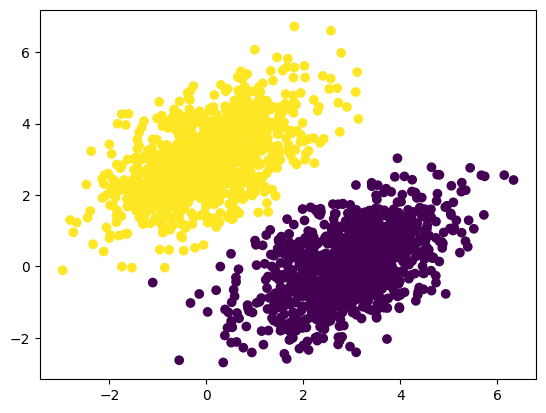

In [20]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c= predictions[:,0] > 0.5)
plt.show()

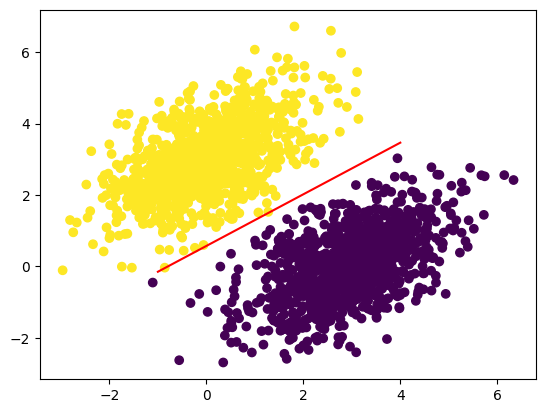

In [21]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x +(0.5-b) / W[1]
plt.plot(x, y, '-r')
plt.scatter(inputs[:,0], inputs[:,1], c= predictions[:,0] > 0.5)
plt.show()

In [22]:
print(W) # 最后更新后的权重

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.12774749],
       [ 0.17680742]], dtype=float32)>


In [23]:
print(b) # 最后更新后的权重

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.39833564], dtype=float32)>


In [25]:
print(W[0])
print(W[1])

tf.Tensor([-0.12774749], shape=(1,), dtype=float32)
tf.Tensor([0.17680742], shape=(1,), dtype=float32)


神经网络剖析：了解核心Keras API
神经网络的基本数据结构：层。层是一个数据处理模块，它接受一个或者多个张量作为输入，并输出一个或者多个张量。有些层是没有状态的，但是大多数层是有状态的，也就是说有权重。
（1）不同类型的层，不同类型的层取决了研究的对象数据结构，如是分类的，列表式的数据就是3阶的，图像数据是4阶的。
Keras 中的核心就是层，或者与层相关的连接，这个层又一个底层的基类就是Layer类，Layer类封装了状态（权重）和计算（向前传播一次）的对象。权重通常在build中定义，（也可以在构造函数__init__中创建）。计算则是在call()中创建。

In [2]:
# 代码清单 3-22 Dense 层的实现，作为Layer类的子类
from tensorflow import keras
class SimpleDense(keras.layers.Layer):
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation
  def build(self, input_shape):
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units), initializer='random_normal')
    self.b = self.add_weight(shape=(self.units,), initializer ='zeros')
  def call(self, inputs):
    y = tf.matmul(inputs, self.W) +self.b
    if self.activation is not None:
      y = self.activation(y)
    return y


In [9]:
import tensorflow as tf
inputs = tf.ones(shape=(2,784))
inputs.shape[-1]
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2,784))
output_tensor = my_dense(input_tensor)
print(output_tensor)

tf.Tensor(
[[0.         0.         0.6074351  2.3850727  0.         0.
  0.10062623 0.266571   0.         0.         0.         0.
  0.         0.         0.9033463  1.1666001  0.2914428  0.
  1.2817613  0.6055708  0.         0.456804   1.3328212  0.536371
  0.4557943  1.2391996  0.         0.61289096 2.1351058  0.9478937
  1.0408008  1.7263546 ]
 [0.         0.         0.6074351  2.3850727  0.         0.
  0.10062623 0.266571   0.         0.         0.         0.
  0.         0.         0.9033463  1.1666001  0.2914428  0.
  1.2817613  0.6055708  0.         0.456804   1.3328212  0.536371
  0.4557943  1.2391996  0.         0.61289096 2.1351058  0.9478937
  1.0408008  1.7263546 ]], shape=(2, 32), dtype=float32)


层的兼容性，每一层直接收特定形状的输入张量，并且返回特定形状的输出张量，

In [1]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation='relu')
# 该层将返回一个第一维的大学是32，他后面只能接一个32维向量作为输入的层

In [10]:

#layer = layers.Dense(32, activation='relu')
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32,activation='relu'),# no inputs
    layers.Dense(32) # no inputs 32 表示的是输出层的维度
])
print(model)


从层到模型，深度学习的模型是由层构成的图，多种层构成的复杂模型就是网络拓扑结构，常见的网络拓扑结构包括：
1. 双分支网络
2. 多头网络
3. 残差连接

模型的拓扑结构定义了一个假设空间，机器学习就是在预先定义的空间内，利用反馈信号的指引，寻找特点输入数据有用的表示。通过选择网络拓扑结构，你可以将可能性空间限定为一系列特点的张量运算，将输入数据映射为输出数据，然后为这些张量运算的权重张量寻找一组合适的值。
对模型的架构是至关重要的，选择不同的架构就可以产生不同的预测效果，这是一种艺术也是一种科学。不同的架构有不同的原则，也就是说对不同的数据，目的，我们需要选择一种特定的架构，使得它能够产生预想的效果。

3.63 一旦选择了模型的架构，还需要设定以下3个参数
1. 损失函数（目标函数）在训练过程中让其最小化，它衡量当前任务是否成功。
2. 优化器，决定如何基于损失函数对神经网络进行更新。它执行的是随机梯度下降的某个变体（SGD）
3. 指标。衡量成功的标准，在训练和验证过程中需要对其进行监控，如分类精度，与损失不同，训练不会直接对这些指标进行优化。因此，指标不需要是可微的。
一旦选定了损失函数，优化器和指标，就可以使用内置函数compile和fit开始训练模型。此外也可以编写自定义循环。
compile()方法的作用就是配置训练过程，这个过程是对上面的3个参数进行配置，如损失函数，优化器，指标。


In [ ]:
model = keras. Sequential([keras.layers.Dense(1)])
model.compile(optimizer='rmsprop', loss='mean_square_error',metrics=['accuracy'])

对上面的优化器，损失函数以及指标，都是一个keras 优化器对象，损失函数对象以及指标对象的一个实例。也可以自定义这些。
compile()之后是fit(). fit()方法执行训练循环，他有以下关键参数
1. 要训练的数据（输入和目标）这些都可以用Numpy或者TensorFlow Dataset 对象传入
2. 训练轮数，训练循环应该在传入的数据上进行多少次迭代
3. 在每轮小批量梯度下降中使用的批量大小，在一次权重更新中，计算梯度所要考虑的训练样本的数目

In [ ]:
#代码清单 3-23 对Numpy 数据调用fit()
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)


3.6.6 监控数据上的损失和指标，监控数据就是训练数据中的一部分，但是这部分数据不会被用来进行训练，仅仅是用来计算损失和指标的预测。从而推断模型的好坏。这部分数据也就是验证数据。


In [14]:
#代码清单3-24 使用validation_data 参数
from tensorflow import keras
import numpy as np
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.BinaryAccuracy()]
)

indices_permutation = np.random.permutation(len(inputs)) #随机打乱顺序的index
shuffled_inputs = inputs[indices_permutation] #打乱的数据的inputs
shuffled_targets = targets[indices_permutation] # 打乱的数据的targets
num_validation_samples = int(0.3*len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(training_inputs,
          tarining_targets,
          epochs=5,
          batch_size=16,
          validation_data=(val_inputs,val_targets))
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)


NameError: name 'inputs' is not defined

3.6.7 模型训练后需要对新的数据进行推断，这个就是利用这个新的训练好的数据对新数据进行预测


In [ ]:
predictions = model(new_inputs)
predictions = model.predict(new_inputs, batch_size=128)

本章总结
Tensorflow 是业界领先的数值计算框架，它可以在CPU，GPU，以及TPU上运行，它可以自动计算任意可微表达式的梯度，也可以分布到许多设备上，还可以将程序移植外部运行环境，如Javascript。

Keras 是利用TensorFlow 进行深度学习的标准API

TensorFlow的关键对象包括张量，变量，张量运算及梯度带

Keras的核心是Layer，层封装了一些权重和计算，并构成了模型，多个层，或者更加复杂的层构成的图或者模型

在训练模型之前，需要选择优化器，损失函数以及指标，可以通过model.compile()来配置

要训练模型，可以调用fit()方法进行小批量梯度下降。也可以用它来监控模型在验证数据上的损失和指标，验证数据是模型在训练的时候看不到的数据。

训练好模型后，就可以predict，用model.predict()方法对新数据进行预测

